In [ ]:
%load_ext autoreload
%autoreload 2

# Picturing vectors in three-dimensional space
ОТОБРАЖЕНИЕ ВЕКТОРОВ В ТРЕХМЕРНОМ ПРОСТРАНСТВЕ

## 3D-рисование на Python
3D Drawing in Python



In [ ]:
from draw3d import *

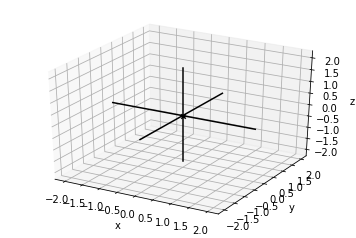

In [ ]:
draw3d()

Чтобы изобразить эти векторы в виде стрелок, их нужно представить как объекты
Arrow3D. Можно также соединить кончики стрелок, добавив объект Segment3D,
как показано далее, и получить рисунок

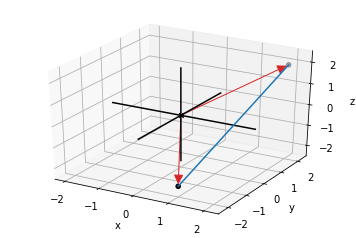

In [ ]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

следующий код нарисует векторы (2, 2, 2) и (1, –2, –2)

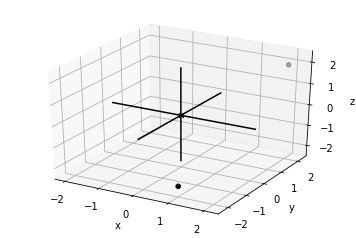

In [ ]:
draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

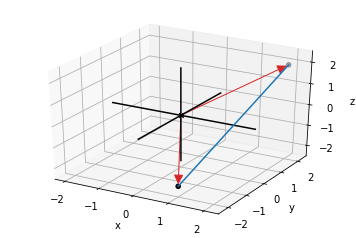

In [ ]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

Глядя на рис., немного сложно понять, в каком направлении указывают
стрелки. Поэтому для большей ясности можно нарисовать пунктирные границы
вокруг стрелок, чтобы они выглядели более объемными. Мы будем рисовать
такие блоки так часто, что я определил класс **Box3D** для представления блока
с одним углом в начале координат и противоположным углом в заданной точке.
На выведенном рис. показано, как выглядят такие блоки, но сначала вот код, который создал этот рисунок:

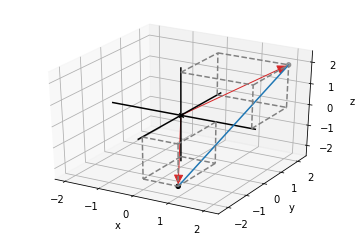

In [ ]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

## Упражнения

**Exercise:** Нарисуйте трехмерную стрелку и точку, представля-
ющие координаты (–1, –2, 2), а также пунктирную рамку, придающую
стрелке объем. Нарисуйте рисунок вручную, чтобы попрактиковаться,
но далее будем использовать только Python.

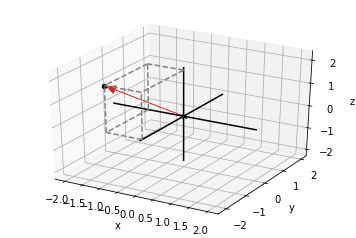

In [ ]:
v = (-1,-2,2)
draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

Вектор (–1, –2, 2) и пунктирная рамка,
придающая дополнительный объем

**Mini project:** Существует ровно восемь трехмерных
векторов, все координаты которых равны +1 или –1. Например, (1, –1, 1) —
один из них. Нарисуйте все восемь векторов как точки. Затем выясните,
как соединить их отрезками, используя объекты Segment3D, чтобы сфор-
мировать контур куба.

**Подсказка.** Всего понадобится 12 сегментов.

**Решение. **Поскольку существует всего 8 вершин и 12 ребер, перечислить
их все будет не слишком сложно, но я решил сделать это с помощью ге-
нератора списка. Для вершин я определил допустимые координаты x, y
и z в виде списка [1, –1] и собрал все восемь результатов в список. Ребра
я сгруппировал в три набора — в каждом по четыре ребра, параллельных
одной из осей координат. Например, есть четыре ребра, соединяющих точки с координатами x = –1 и x = 1 и одинаковыми координатами y и z
на обоих концах:

In [ ]:
pm1 = [1,-1]

In [ ]:
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]

In [ ]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

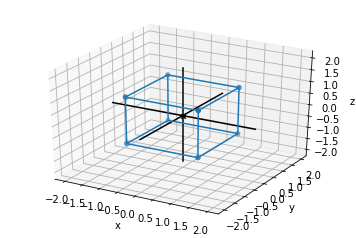

In [ ]:
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

Куб, все вершины которого имеют координаты +1 или –1

#  Vector arithmetic in 3D
#АРИФМЕТИКА ТРЕХМЕРНЫХ ВЕКТОРОВ

## Adding 3D vectors
##Сложение трехмерных векторов

Мы можем написать на Python короткую функцию, складывающую любое ко-
личество векторов в двух или трех измерениях

In [ ]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

Разберем ее работу. Функция zip извлечет из входных векторов их координа-
ты x, y и z, например:

In [ ]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

(Чтобы вывести результат, возвращаемый функцией zip, его нужно преобра-
зовать в список.) Далее к каждой группе координат применяется функция sum,
чтобы получить суммы координат x, y и z:

In [ ]:
[sum(coords) for coords in [(1, 2, 4), (1, 4, 2), (3, -4, -2)]]

[7, 7, -3]

Наконец, полученный список преобразуется в кортеж, потому что до сих пор
все векторы мы представляли в виде кортежей. Результат — это кортеж (7, 7, 3).
Функцию add можно было бы уместить в одну строку (хотя такой код выглядит
менее идиоматичным для Python):

In [ ]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [ ]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

## Computing lengths and distances
##Вычисление длин и расстояний

длина трехмерного вектора вычисляется по следующей формуле:

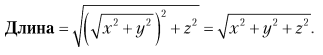

Очень похоже на формулу вычисления длины в двухмерном пространстве. В обо-
их пространствах, двух- и трехмерном, длина вектора равна квадратному корню
из суммы квадратов его компонентов. Поскольку в следующей функции длина
входного кортежа нигде явно не указывается, она будет правильно работать
и с двухмерными, и с трехмерными векторами:

In [ ]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

Вызов, например, length((3,4,12)) вернет 13.

In [ ]:
length((3,4,12))

13.0

## Упражнения

**Exercise:** Нарисуйте трехмерные векторы (4, 0, 3) и (–1, 0, 1) как
объекты Arrow3D так, чтобы один начинался в конце другого в обоих
порядках. Чему равна их векторная сумма?

**Решение.** Векторную сумму можно найти с помощью созданной нами
функции add:

In [ ]:
add((4,0,3),(-1,0,1))

(3, 0, 4)

Затем, чтобы нарисовать их цепочкой обоими способами, проводим
стрелки от начала координат к каждой точке и затем от каждой точки —
к векторной сумме (3, 0, 4). Подобно объекту Arrow, объект Arrow3D принимает в первом аргументе конец стрелки и во втором необязатель-
ном аргументе — начало, если стрелка должна начинаться не в начале координат:

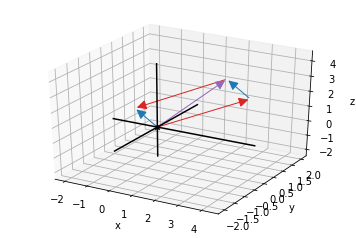

In [ ]:
draw3d(
    Arrow3D((4,0,3),color=red),
    Arrow3D((-1,0,1),color=blue),
    Arrow3D((3,0,4),(4,0,3),color=blue),
    Arrow3D((-1,0,1),(3,0,4),color=red),
    Arrow3D((3,0,4),color=purple)
)

Как показывает результат сложения
векторов, (4, 0, 3) + (–1, 0, 1) = (–1, 0, 1) + (4, 0, 3) = (3, 0, 4)

**Exercise:** Представьте, что у нас есть два набора векторов:
vectors1 = [(1,2,3,4,5), (6,7,8,9,10)] и vectors2 = [(1,2), (3,4), (5,6)].
Не прибегая к помощи Python, определите длину списка, который вернет
zip(*vectors1) и zip(*vectors2).

Решение. Первый вызов zip вернет список длиной 5. Поскольку в каждом
из двух входных векторов пять координат, zip(*vectors1) вернет список
с пятью кортежами, по два элемента в каждом. Аналогично, zip(*vectors2)
вернет список длиной 2 — с двумя кортежами, содержащими все компо-
ненты x и все компоненты y соответственно.

In [ ]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]

In [ ]:
vectors2=[(1,2), (3,4), (5,6)]

In [ ]:
len(list(zip(*vectors1)))

5

In [ ]:
len(list(zip(*vectors2)))

2

**Mini project:** Следующий генератор списков создает
список с 24 векторами:
```
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
```
Найдите сумму 24 векторов. Нарисуйте все 24 вектора цепочкой как
объекты Arrow3D.

**Решение**. Если нарисовать все заданные векторы цепочкой, то получится
спиралевидная форма:

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


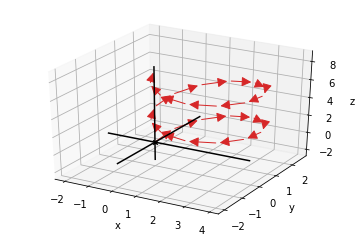

In [ ]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

running_sum = (0,0,0) #<1>
arrows = []
for v in vs:
    next_sum = add(running_sum, v) #2
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

Сумма:

(–4.440892098500626e–16, –7.771561172376096e–16, 7.9999999999999964)
или, если округлить, (0, 0, 8).

**Exercise:** Напишите функцию `scale(scalar, vector)`, которая

возвращает результат умножения скаляра scalar на вектор vector. В част-
ности, напишите ее так, чтобы она могла принимать и двухмерные, и трех-
мерные векторы, а также векторы с любым другим числом измерений.

**Решение.** Умножение реализуется с помощью генератора списков: он
умножает каждую координату в векторе на скаляр. Затем генератор пре-
образуется в кортеж:

In [ ]:
def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

**Mini project:** Координаты 3, 4, 12 независимо от по-
рядка создают вектор длиной, равной целому числу 13. Это довольно
необычно, потому что большинство чисел не являются идеальными
квадратами и квадратный корень в формуле длины обычно возвращает
иррациональное число. Найдите другую тройку целых чисел, определя-
ющую координаты вектора с целочисленной длиной.

**Решение.** Следующий код ищет тройки убывающих целых чисел меньше
100 (это число выбрано произвольно):

In [ ]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)

In [ ]:
list(vectors_with_whole_number_length())

[(2, 2, 1),
 (4, 4, 2),
 (6, 3, 2),
 (6, 6, 3),
 (7, 4, 4),
 (7, 6, 6),
 (8, 4, 1),
 (8, 8, 4),
 (9, 6, 2),
 (10, 10, 5),
 (11, 10, 2),
 (12, 4, 3),
 (12, 6, 4),
 (12, 9, 8),
 (12, 12, 1),
 (12, 12, 6),
 (14, 5, 2),
 (14, 8, 8),
 (14, 12, 12),
 (14, 14, 7),
 (15, 10, 6),
 (16, 8, 2),
 (16, 11, 8),
 (16, 13, 4),
 (16, 15, 12),
 (16, 16, 8),
 (17, 6, 6),
 (18, 6, 1),
 (18, 9, 6),
 (18, 12, 4),
 (18, 13, 6),
 (18, 14, 3),
 (18, 18, 9),
 (19, 8, 4),
 (20, 5, 4),
 (20, 12, 9),
 (20, 20, 10),
 (20, 20, 17),
 (21, 12, 12),
 (21, 16, 12),
 (21, 18, 14),
 (21, 18, 18),
 (22, 6, 3),
 (22, 14, 7),
 (22, 20, 4),
 (22, 21, 6),
 (22, 22, 11),
 (23, 10, 10),
 (23, 14, 2),
 (24, 8, 6),
 (24, 12, 3),
 (24, 12, 8),
 (24, 12, 11),
 (24, 16, 3),
 (24, 18, 16),
 (24, 24, 2),
 (24, 24, 12),
 (24, 24, 23),
 (25, 10, 2),
 (25, 20, 8),
 (26, 7, 2),
 (26, 18, 15),
 (26, 22, 19),
 (26, 26, 13),
 (27, 14, 6),
 (27, 18, 6),
 (27, 24, 8),
 (28, 10, 4),
 (28, 16, 7),
 (28, 16, 16),
 (28, 17, 4),
 (28, 21, 12),
 (28,

Эта функция нашла 869 векторов с целочисленными координатами и дли-
нами. Самый короткий из них — (2, 2, 1), его длина 3, а самый длинный —
(99, 90, 70) с длиной 150.

**Exercise:** Найдите вектор, указывающий в том же направлении,
что и (–1, –1, 2), но с длиной 1.

**Подсказка.** Найдите подходящий скаляр, чтобы умножить на него ис-
ходный вектор и получить требуемую длину.

**Решение.** Вектор (–1,–1, 2)имеет длину около 2,45,поэтомуискомыйскаляр
равен 1/2,45. Умножение исходного вектора на него даст вектор с длиной 1:

In [ ]:
length((-1,-1,2))

2.449489742783178

In [ ]:
s = 1/length((-1,-1,2))

In [ ]:
scale(s,(-1,-1,2))

(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [ ]:
length(scale(s,(-1,-1,2)))

1.0

Округлив каждую координату до сотых долей, получаем искомый вектор
(–0,41, –0,41, 0,82).

# Computing the cross product of 3D vectors
#СКАЛЯРНОЕ ПРОИЗВЕДЕНИЕ ВЕКТОРОВ: МЕРА СОНАПРАВЛЕННОСТИ ВЕКТОРОВ

## Вычисление скалярного произведения

Мы можем написать на Python функцию скалярного произведения, которая принимает любые пары векторов и вычисляет скалярное произведение, если они имеют одинаковое количество координат, например:

In [ ]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

Этот код использует функцию zip для объединения соответствующих коор-
динат в кортежи, а затем умножает каждую пару и складывает произведения.

Задействуем эту функцию для дальнейшего изучения поведения скалярного
произведения.

## Примеры скалярных произведений

Неудивительно, что скалярное произведение двух векторов, лежащих на разных
осях, равно нулю. Мы знаем, что оси, а значит, и сами векторы перпендикулярны:

In [ ]:
dot((1,0),(0,2))

0

In [ ]:
dot((0,3,0),(0,0,-5))

0

Мы также можем подтвердить, что более длинные векторы дают большие ска-
лярные произведения. Например, умножение любого вектора на 2 удваивает
результат скалярного произведения:

In [ ]:
dot((3,4),(2,3))

18

In [ ]:
dot(scale(2,(3,4)),(2,3))

36

In [ ]:
dot((3,4),scale(2,(2,3)))

36

Оказывается, скалярное произведение пропорционально длинам обоих векто-
ров. Если взять скалярное произведение двух векторов, указывающих в одном
направлении, то оно будет точно равно произведению длин. Например, (4, 3)
имеет длину 5, а (8, 6) — длину 10. Скалярное произведение равно 5 · 10:

In [ ]:
dot((4,3),(8,6))

50

## Измерение углов с помощью скалярного произведения

Скалярное произведение двух векторов на рис.

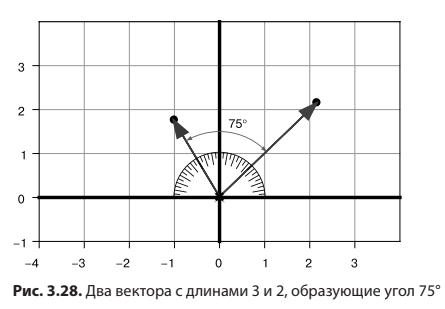

 равно 3 · 2 · cos 75°. Преоб-
разовав угол из градусов в радианы, результат, примерно равный 1,55, можно
вычислить с помощью Python:

In [ ]:
from math import cos,pi

In [ ]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

Поскольку ни функция dot, ни функция length не ограничены определенным количеством измерений, то и новая функция получится универсальной. Мы можем использовать тот факт, что u · v = |u| · |v| · cos θ и, следовательно,
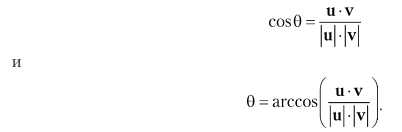

Эту формулу легко выразить в коде на Python:

In [ ]:
def angle_between(v1,v2):
    return acos(
                dot(v1,v2) /
                (length(v1) * length(v2))
            )

**Mini project:** Найдите вектор u длиной 3 и вектор v
длиной 7 такие, что u · v = 21. Найдите другую пару векторов u и v,
такую, что u · v = –21. Наконец, найдите еще три пары векторов дли-
ной 3 и 7 и покажите, что их скалярные произведения лежат в диапазоне
между –21 и 21.

**Решение.** Два вектора, указывающие точно в одном направлении (напри-
мер, лежащие на оси x), будут иметь максимально возможное скалярное
произведение:

In [ ]:
dot((3,0),(7,0))

21

Два вектора, указывающие точно в противоположных направлениях (на-
пример, в положительном и отрицательном направлениях оси y), будут
иметь наименьшее из возможных скалярное произведение:

In [ ]:
dot((0,3),(0,-7))

-21

Используя полярные координаты, можно легко сгенерировать еще не-
сколько векторов с длинами 3 и 7, образующих случайные углы:

In [ ]:
from vectors import to_cartesian
from random import random
from math import pi

def random_vector_of_length(l):
    return to_cartesian((l, 2*pi*random()))

pairs = [(random_vector_of_length(3), random_vector_of_length(7))
            for i in range(0,3)]
for u,v in pairs:
    print("u = %s, v = %s" % (u,v))
    print("length of u: %f, length of v: %f, dot product :%f" %
                (length(u), length(v), dot(u,v)))

u = (0.14317567615339055, 2.9965815066101604), v = (4.015170265108397, -5.7339696321300275)
length of u: 3.000000, length of v: 7.000000, dot product :-16.607433
u = (0.7327707232895235, 2.9091316689159585), v = (-2.8856954383684053, -6.37752003814804)
length of u: 3.000000, length of v: 7.000000, dot product :-20.667599
u = (-1.191912147595753, 2.753061102194007), v = (-3.513907103757361, 6.054127258834551)
length of u: 3.000000, length of v: 7.000000, dot product :20.855651


**Exercise:** Пусть uиv — векторытакие, что |u|=3,61и|v|=1,44. Пусть
уголмежду u и v равен 101,3°. Определите, чему равно u · v. Варианты ответа:
1. 5,198.
2. 5,098.
3. –1,019.
4. 1,019.

**Решение.** Заданные значения можно подставить в новую формулу ска-
лярного произведения и с соответствующим преобразованием градусов
в радианы оценить результат с помощью Python:

In [ ]:
3.61 * 1.44 * cos(101.3 * pi / 180)

-1.0186064362303022

После округления до трех знаков после запятой этот результат соответ-
ствует варианту 3.

**Mini Project:** Найдите угол между векторами (3, 4)
и (4, 3), преобразовав их в полярные координаты и вычислив разность
углов. Варианты ответа:
1. 1,569.
2. 0,927.
3. 0,643.
4. 0,284.

**Подсказка.** Вариант должен совпадать со значением скалярного произ-
ведения.

**Решение.** Вектор (3, 4) образует больший угол с положительным направ-
лением оси x, поэтому вычтем угол (4, 3) из угла (3, 4). Результат точно
соответствует варианту 4:

In [ ]:
from vectors import to_polar
r1,t1 = to_polar((4,3))
r2,t2 = to_polar((3,4))
t1-t2

-0.2837941092083278

In [ ]:
t2-t1

0.2837941092083278